In [12]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


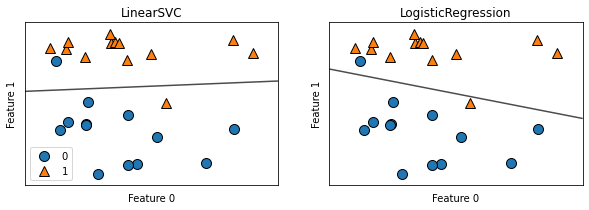

In [10]:
X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=False,eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

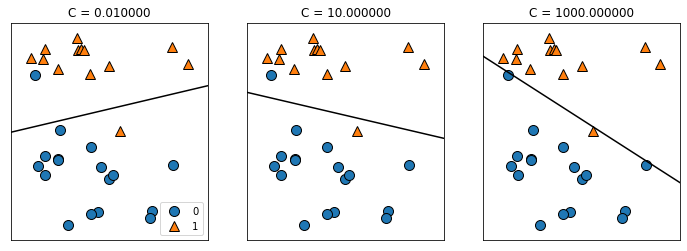

In [11]:
mglearn.plots.plot_linear_svc_regularization()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state =42)

logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))

Training set score:0.946
Test set score:0.958


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### ↑訓練セットとテストセットの精度が近すぎるため、適合不足と判断

In [16]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg100.score(X_test,y_test)))

Training set score:0.941
Test set score:0.965


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
logreg001 =LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

Training set score:0.934
Test set score:0.930


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


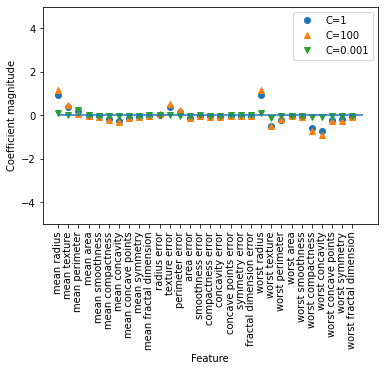

In [26]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation =90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [29]:
for C, maker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty ="l2").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}:{:.2f} ".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}:{:.2f} ".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T,maker,label="C={:.3f}".format(C))

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.